In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [195]:
df = pd.read_csv("../results/results.csv")
df.head()

,Dataset,Method,Split,Accuracy,Iterations,History
0,breast_cancer_wisconsin_original,IWLS,0.1,0.945652,8.0,"[0.6931471805599453, 0.2166210628934026, 0.128..."
1,breast_cancer_wisconsin_original,SGD,0.1,0.945652,86.0,"[0.6931471805599453, 0.15543621681892533, 0.11..."
2,breast_cancer_wisconsin_original,Adam,0.1,0.945652,500.0,"[0.6931471805599453, 0.6757739686550137, 0.658..."
3,breast_cancer_wisconsin_original,LDA,0.1,0.945652,NaN,NaN
4,breast_cancer_wisconsin_original,QDA,0.1,0.934783,NaN,NaN


In [196]:
df[df["Method"] == "IWLS"]["Iterations"].mean()

5.728395061728395

In [197]:
df[df["Method"] == "SGD"]["Iterations"].mean()

55.4320987654321

In [198]:
df[df["Method"] == "Adam"]["Iterations"].mean()

348.641975308642

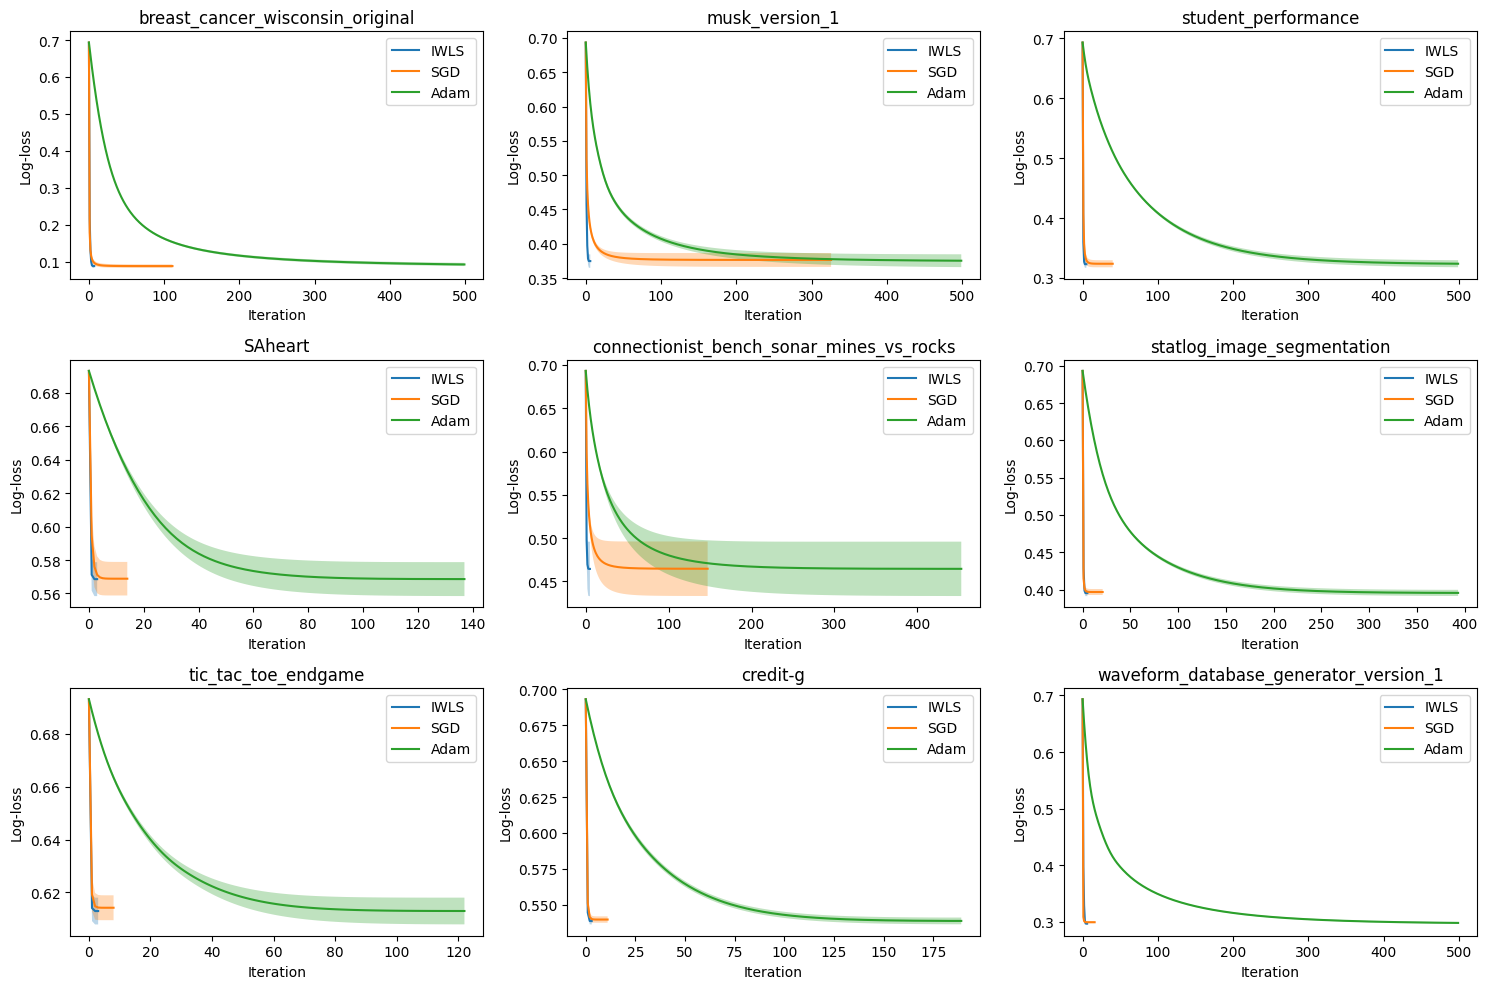

In [200]:
num_rows = 3
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
unique_datasets = df["Dataset"].unique()
for i, ds in enumerate(unique_datasets):
    ax = axs[i % 3, i // 3]
    df2 = df[df["Dataset"] == ds].dropna()
    for method in df2["Method"].unique():
        df3 = df2[df2["Method"] == method]
        hists = [eval(hist) for hist in df3["History"].values]
        max_len = max(len(hist) for hist in hists)
        for hist in hists:
            while len(hist) < max_len:
                hist.append(hist[-1])
        hists = np.array(hists)
        means = np.mean(hists, axis=0)
        stds = np.std(hists, axis=0)
        ax.plot(means, label=method)
        ax.fill_between(range(len(means)), means - stds, means + stds, alpha=0.3)
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Log-loss")
    ax.set_title(ds)
    ax.legend()

# Hide any unused subplots
for i in range(len(unique_datasets), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


5
6
1
5
5
5
6
4
5


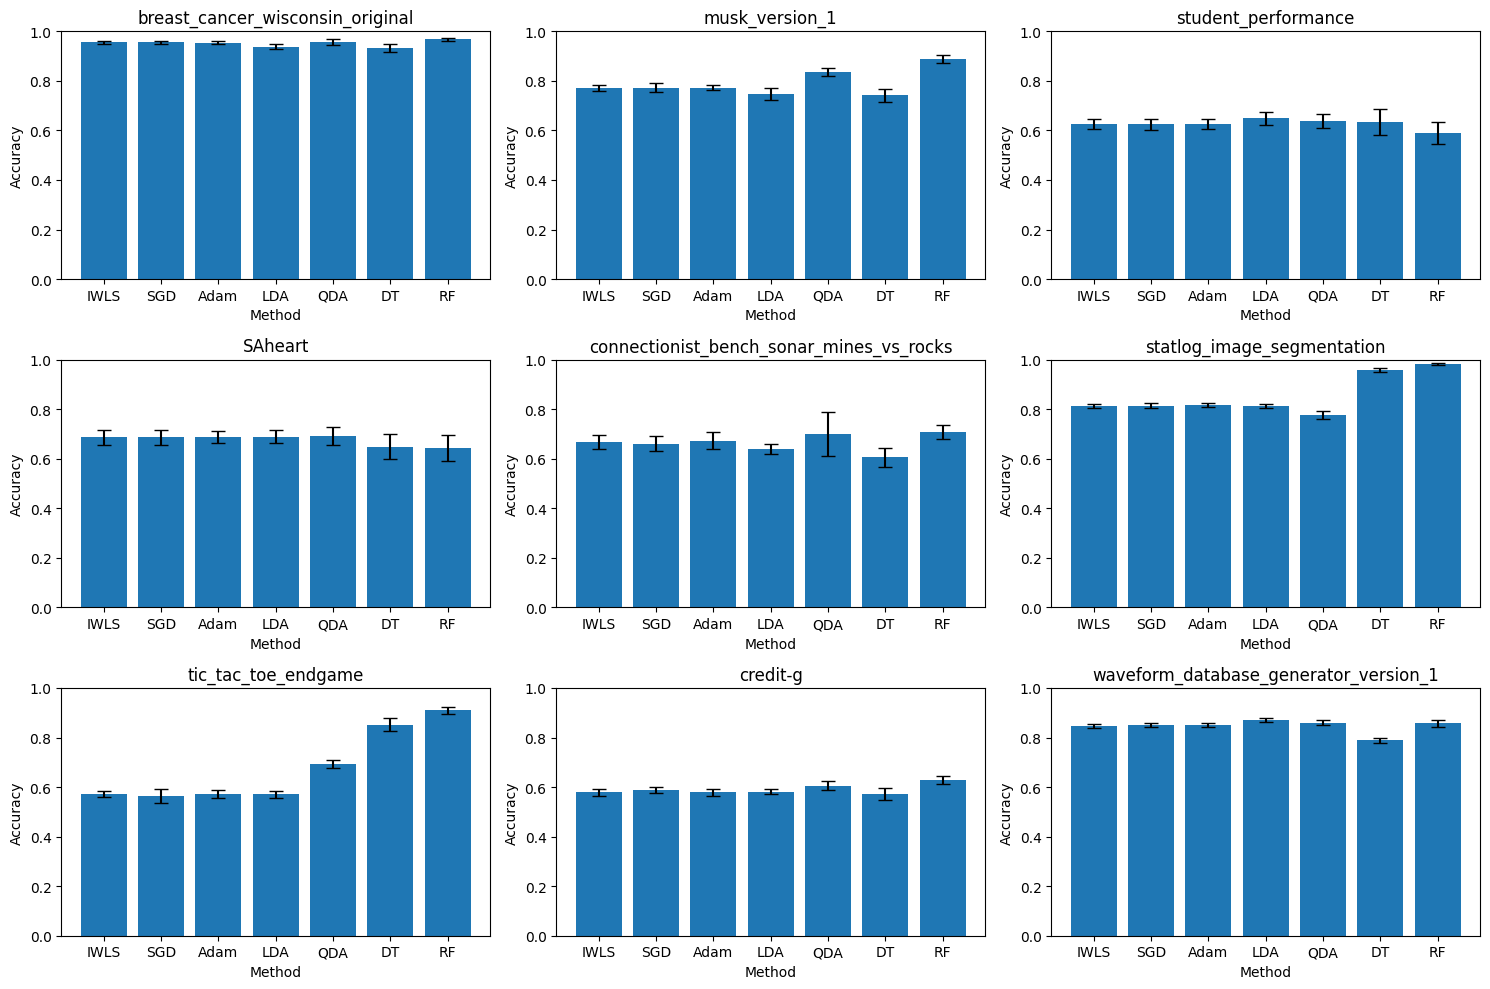

In [201]:
num_rows = 3
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
unique_datasets = df["Dataset"].unique()
for i, ds in enumerate(unique_datasets):
    ax = axs[i % 3, i // 3]
    df2 = df[df["Dataset"] == ds]
    accs = []
    for split in df2["Split"].unique():
        df3 = df2[df2["Split"] == split]
        accs.append(df3["Accuracy"].values)
    accs = np.array(accs)
    means = np.mean(accs, axis=0)
    print(np.argmin(means))
    stds = np.std(accs, axis=0)
    ax.bar(['IWLS', 'SGD', 'Adam', 'LDA', 'QDA', 'DT', 'RF'], means, yerr=stds, capsize=5)
    ax.set_xlabel("Method")
    ax.set_ylabel("Accuracy")
    ax.set_ylim(0, 1)
    ax.set_title(ds)

# Hide any unused subplots
for i in range(len(unique_datasets), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


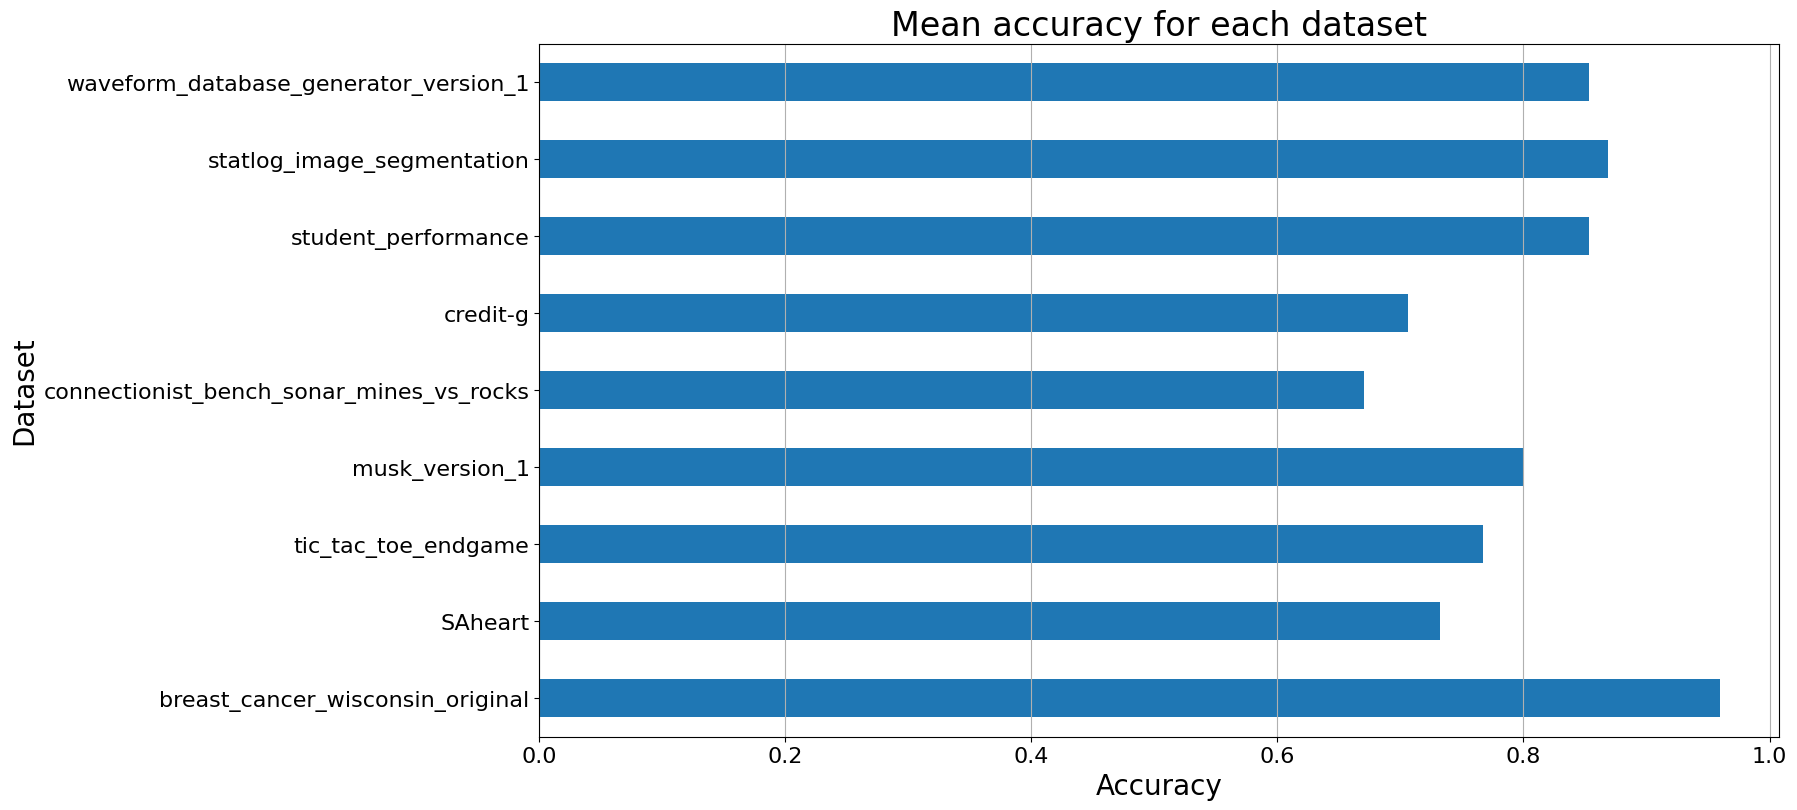

In [164]:
# plot mean acc for each dataset
plt.figure(figsize=(16, 9))
df.groupby("Dataset", sort=False)["Accuracy"].mean().plot(kind="barh")
plt.title("Mean accuracy for each dataset", fontsize=24)
plt.xlabel("Accuracy", fontsize=20)
plt.ylabel("Dataset", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis="x")
plt.show()

In [203]:
df = pd.read_csv("../results/results2.csv")
df.head()

,Dataset,Method,Split,Accuracy,Iterations,History
0,breast_cancer_wisconsin_original,IWLS,0.1,0.956522,8,"[0.6931471805599453, 0.2166210628934026, 0.128..."
1,breast_cancer_wisconsin_original,SGD,0.1,0.956522,86,"[0.6931471805599453, 0.1535567473141377, 0.116..."
2,breast_cancer_wisconsin_original,Adam,0.1,0.956522,500,"[0.6931471805599453, 0.6757739686550137, 0.658..."
3,breast_cancer_wisconsin_original,IWLS+INT,0.1,0.956522,10,"[0.6931471805599453, 0.19229651468922895, 0.11..."
4,breast_cancer_wisconsin_original,SGD+INT,0.1,0.956522,389,"[0.6931471805599453, 0.14974109442423242, 0.11..."


5
0
4


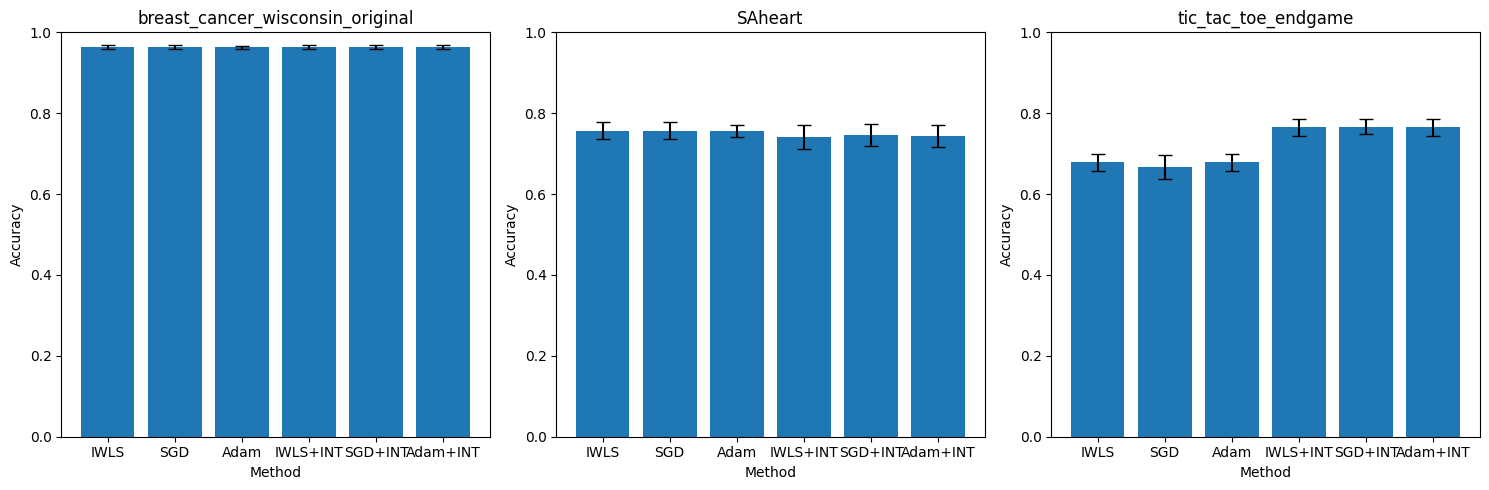

In [204]:
num_rows = 1
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5))
unique_datasets = df["Dataset"].unique()
for i, ds in enumerate(unique_datasets):
    ax = axs[i]
    df2 = df[df["Dataset"] == ds]
    accs = []
    for split in df2["Split"].unique():
        df3 = df2[df2["Split"] == split]
        accs.append(df3["Accuracy"].values)
    accs = np.array(accs)
    means = np.mean(accs, axis=0)
    print(np.argmax(means))
    stds = np.std(accs, axis=0)
    ax.bar(['IWLS', 'SGD', 'Adam', 'IWLS+INT', 'SGD+INT', 'Adam+INT'], means, yerr=stds, capsize=5)
    ax.set_xlabel("Method")
    ax.set_ylabel("Accuracy")
    ax.set_ylim(0, 1)
    ax.set_title(ds)

# Hide any unused subplots
for i in range(len(unique_datasets), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()
